In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.rcParams.update({'xtick.labelsize' : '15'})
plt.rcParams.update({'ytick.labelsize' : '15'})
plt.rcParams.update({'legend.fontsize' : '15'})
plt.rcParams.update({'font.size' : '24'})

'''
@author: Mattias Lazda 
@collab: Amalia Keralis, David Tucci, Jules Fauscher, Nicholas Desjardins, Anna Hoban 
'''

'\n@author: Mattias Lazda \n@collab: Amalia Keralis, David Tucci, Jules Fauscher, Nicholas Desjardins, Anna Hoban \n'

# Question 2.2

In [38]:
npts = 1000
ν = np.linspace(1,1e4,npts)

def func(u):
    
    # define constants 
    ρ = 1 #g/cm^3 
    r = 10 #cm 
    l1 = 10 #cm
    l2 = 155 #cm 
    
    # Form drag on head
    F_form_head = 0.5*ρ*np.power(u,2)*(np.pi*np.power(r,2)/2)
    
    # Stokes drag on head 
    F_stokes_head = 3*np.pi*ρ*ν*r*u
    
    # Skin drag on first 10 cm of body
    F_stokes_body = ρ*np.power(ν, 0.5)*np.power(u, 1.5)*(2*r)*np.power(l1,0.5)
    
    # Turbulent skin drag on rest of body 
    F_skin_turb = 0.5*ρ*np.power(u,2)*(l2*2*r)
       
    return u*(F_form_head + F_stokes_head  + F_skin_turb + F_stokes_body) - 1.62e9 

In [39]:
solution = fsolve(func, np.asarray(npts*[100]))

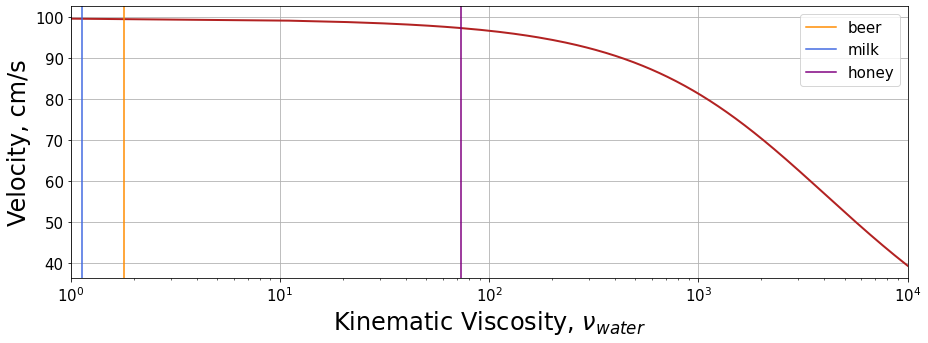

In [48]:
# Some common viscosities 
ν_water = 0.01
beer = (1.8e-6 * 10000) / ν_water
milk = (1.13e-6 * 10000) / ν_water 
honey = (7.36e-5 * 10000) / ν_water

plt.figure(figsize=(15,5))
plt.plot(ν, solution, color = 'firebrick', linewidth=2)
plt.axvline(beer, label = 'beer', color = 'darkorange')
plt.axvline(milk, label = 'milk', color = 'royalblue')
plt.axvline(honey, label = 'honey', color = 'purple')
plt.xscale('log')
plt.xlabel(r'Kinematic Viscosity, $ν_{water}$')
plt.ylabel(r'Velocity, cm/s')
plt.xlim(1,1e4)
plt.grid()
plt.legend()
plt.show()

**FIGURE 1:** Velocity of swimmer in $cm/s$ as a function of kinematic viscosity (in terms of $\nu_{\text{water}}$) in order to maintain a power output of $P \approx 1.6\times10^9$ erg/s. Viscosity of beer, milk and honey included for reference. Common viscosities were obtained from here:
https://www.engineersedge.com/fluid_flow/kinematic-viscosity-table.htm. This makes sense with what we'd expect, e.g. that as the viscosity of the fluid increases, the maximum speed we can achieve decreases if given the same amount of power to sustain the movement. 

# Question 2.3

The percent difference is simply: 
\begin{equation}
\%_{\text{diff}} = \frac{u_0 - u}{u_0} \times 100 = \frac{100\text{cm/s} - u}{100\text{cm/s}} \times 100 = \boxed{100 - u}
\end{equation}

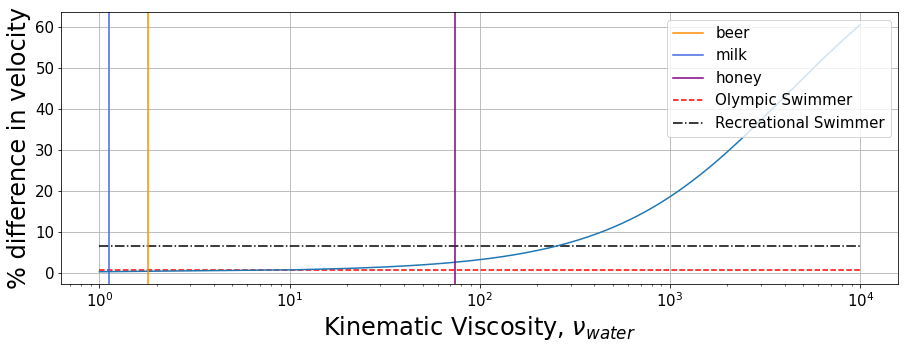

In [49]:
# The below times are the times taken to complete 100 m at the 2020 Olympic games in Tokyo
times = np.array([47.02,47.08,47.44, 47.72,48.10])
# Convert to velocities
velocities = 100/times
# Get standard deviation and mean
std = np.std(velocities)
mean = np.mean(velocities)

# Margin of error for olympic swimmer 
marg_err_olym = (std/mean) * 100


# For non-olympic swimmers, I'll just guess some times, assuming it takes an additional 30s - 50s for a recreational swimmer
# to complete the 100 m 
# Randomly generate some numbers
times = np.random.randint(47 + 30, 47 + 50, 100)
velocities = 100/times 
std = np.std(velocities)
mean = np.mean(velocities)

# Compute margin of error for recreational swimmer 
marg_err_rec = (std/mean) * 100 

plt.figure(figsize=(15,5))
plt.plot(ν, (100 - solution))
plt.hlines(marg_err_olym, ν[0], ν[-1], ls = '--', label = 'Olympic Swimmer', color = 'red')
plt.hlines(marg_err_rec, ν[0], ν[-1], ls = '-.', label = 'Recreational Swimmer', color = 'black')
plt.axvline(beer, label = 'beer', color = 'darkorange')
plt.axvline(milk, label = 'milk', color = 'royalblue')
plt.axvline(honey, label = 'honey', color = 'purple')
plt.xscale('log')
plt.xlabel(r'Kinematic Viscosity, $ν_{water}$')
plt.ylabel(r'% difference in velocity')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

**FIGURE 2:** Percent difference in velocity (relative to $100$ cm / s) as a function of kinematic viscosity (relative to $\nu_\text{water}$). Viscosity of beer, milk and honey included for reference. The plot highlights that for olympic swimmers, the margin of error is so small such that a small difference in the viscosity could lead to drastically different results, whereas for recreational swimmers (like us), it would take a big change in kinematic viscosity of the water before we notice any meaningful change. Olympic swimming times were obtained from here:https://olympics.com/en/olympic-games/tokyo-2020/results/swimming/men-s-100m-freestyle